# **Setup**

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# **Data Import**

In [43]:
df = pd.read_csv('cardekho_dataset.csv',index_col=0)

print(df.shape)
df.head(10)

(15411, 13)


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [44]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [45]:
df.rename({'km_driven':'Odometer','fuel_type':'Fuel','max_power':'Power','vehicle_age':'Age',
           'transmission_type':'Transmission'},axis=1,inplace=True)
df.columns

Index(['car_name', 'brand', 'model', 'Age', 'Odometer', 'seller_type', 'Fuel',
       'Transmission', 'mileage', 'engine', 'Power', 'seats', 'selling_price'],
      dtype='object')

In [46]:
df.isna().sum() 

car_name         0
brand            0
model            0
Age              0
Odometer         0
seller_type      0
Fuel             0
Transmission     0
mileage          0
engine           0
Power            0
seats            0
selling_price    0
dtype: int64

In [47]:
df.duplicated().sum()

167

In [48]:
print('Current Dataframe Shape: ',df.shape)

# Drop Duplicates
df.drop_duplicates(inplace=True)
print('Modified Dataframe Shape: ',df.shape)

Current Dataframe Shape:  (15411, 13)
Modified Dataframe Shape:  (15244, 13)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       15244 non-null  object 
 1   brand          15244 non-null  object 
 2   model          15244 non-null  object 
 3   Age            15244 non-null  int64  
 4   Odometer       15244 non-null  int64  
 5   seller_type    15244 non-null  object 
 6   Fuel           15244 non-null  object 
 7   Transmission   15244 non-null  object 
 8   mileage        15244 non-null  float64
 9   engine         15244 non-null  int64  
 10  Power          15244 non-null  float64
 11  seats          15244 non-null  int64  
 12  selling_price  15244 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [49]:
df.head(10)

,car_name,brand,model,Age,Odometer,seller_type,Fuel,Transmission,mileage,engine,Power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


# **Data Exploration**

In [53]:
df.columns

Index(['car_name', 'brand', 'model', 'Age', 'Odometer', 'seller_type', 'Fuel',
       'Transmission', 'mileage', 'engine', 'Power', 'seats', 'selling_price'],
      dtype='object')

## **Unique Values**

In [57]:
for col in df.loc[:,['brand','seller_type','Fuel','Transmission','seats']].columns:
    print('No. Of Unique Values In ' + col, df[col].nunique())
    print('Unique Values In ' + col)
    print(df[col].unique())
    print('=============================\n')

No. Of Unique Values In brand 32
Unique Values In brand
['Maruti' 'Hyundai' 'Ford' 'Renault' 'Mini' 'Mercedes-Benz' 'Toyota'
 'Volkswagen' 'Honda' 'Mahindra' 'Datsun' 'Tata' 'Kia' 'BMW' 'Audi'
 'Land Rover' 'Jaguar' 'MG' 'Isuzu' 'Porsche' 'Skoda' 'Volvo' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Nissan' 'ISUZU' 'Ferrari' 'Mercedes-AMG'
 'Rolls-Royce' 'Force']

No. Of Unique Values In seller_type 3
Unique Values In seller_type
['Individual' 'Dealer' 'Trustmark Dealer']

No. Of Unique Values In Fuel 5
Unique Values In Fuel
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

No. Of Unique Values In Transmission 2
Unique Values In Transmission
['Manual' 'Automatic']

No. Of Unique Values In seats 8
Unique Values In seats
[5 8 7 6 4 2 9 0]



# **Popular Car Make**

In [62]:
df['brand'].value_counts()

brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus               9
Isuzu               7
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

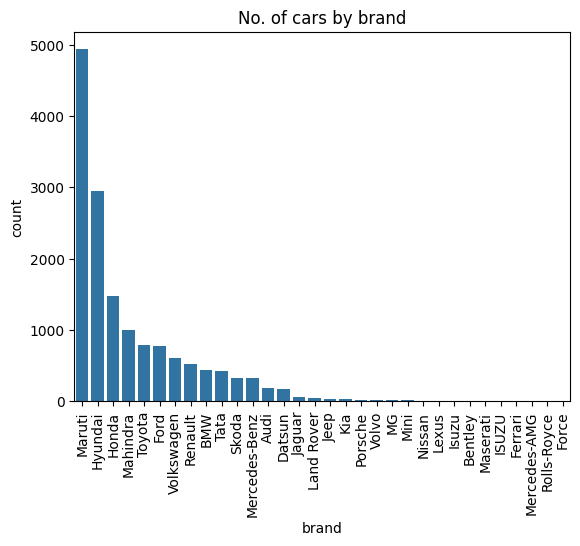

In [69]:
sns.countplot(df,x='brand',order=df['brand'].value_counts().index)
plt.title('No. of cars by brand')
plt.xticks(rotation=90)
plt.show()